In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


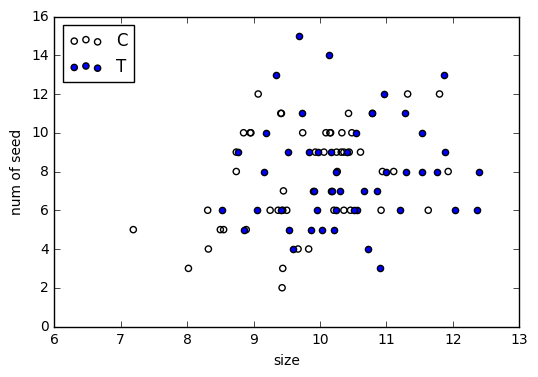

In [5]:
plt.scatter(data.x[data.f=='C'],data.y[data.f=='C'],label='C',facecolor='none')
plt.scatter(data.x[data.f=='T'],data.y[data.f=='T'],label='T')
plt.legend(loc='upper left')
plt.xlabel('size')
plt.ylabel('num of seed')

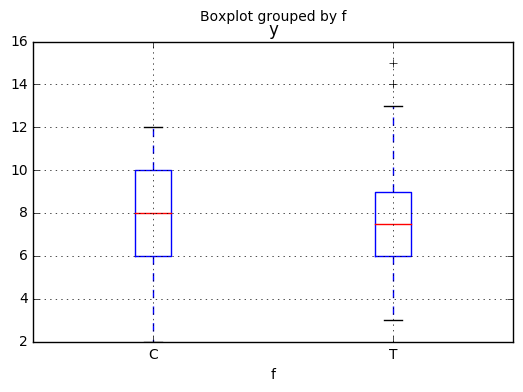

In [6]:
data.boxplot('y',by='f')

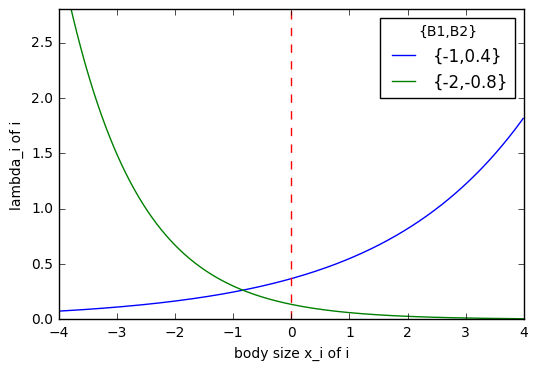

In [7]:
import numpy as np
x = np.arange(-4,4,0.01)

plt.plot(x,np.exp(-1+0.4*x),label='{-1,0.4}')
plt.plot(x,np.exp(-2+-0.8*x),label='{-2,-0.8}')
plt.axvline(0,c='r',ls='--')
plt.legend(title='{B1,B2}')
plt.xlabel('body size x_i of i')
plt.ylim([0,2.8])
plt.ylabel('lambda_i of i')
plt.show()

In [8]:
import statsmodels.api as sm

In [9]:
data.x_c = sm.add_constant(data.x) #constデータの追加
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 12 Jan 2017   Deviance:                       84.993
Time:                        00:33:22   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

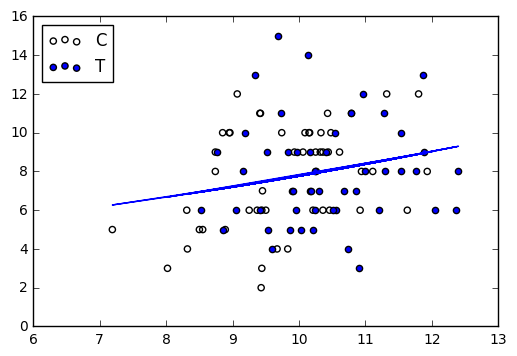

In [11]:
plt.scatter(data.x[data.f=='C'],data.y[data.f=='C'],label='C',facecolors='none')
plt.scatter(data.x[data.f=='T'],data.y[data.f=='T'],label='T')
plt.legend(loc='upper left')

x = np.arange(min(data.x),max(data.x),(max(data.x) - min(data.x)) / 100.)
plt.plot(data.x,result.predict(data.x_c))

In [16]:
data['f_int'] = (data['f'] == 'T').astype(int)
data.x_c = sm.add_constant(data['f_int'])

In [21]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())

In [22]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 12 Jan 2017   Deviance:                       89.475
Time:                        00:56:21   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000         1.952     2.151
f_int          0.0128      0.071      0.179      0.858        -0.127     0.153
==============================================================================
"""